## Linear Regression Assumptions
- 1. Linearity

The linearity assumption requires that there is a linear relationship between our target variable (Sales) and its predictor variables. Trying to fit a non-linear dataset to a linear model would fail. This can best be tested using a scatter plot. Removing outliers is very important for this assumption due to major impacts occurring from the presence of outliers. 

- 2. Normality

The normality assumption requires that the model residuals should follow a normal distribution. The easiest way to check this assumption is via a histogram or a quantile-quantile plot (Q-Q-Plot).

- 3. Homoscedasticity

Homoscedasticity indicates that a dependent variable has an equal variance across values of the independent 
variable. Our residuals should be equal across our regression line.

In [270]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.graphics.gofplots import qqplot

## Data wrangling
- data import
- data type
- missing values
- data normalization
- data bins
- dummy variables

### Data Import

In [282]:
other_path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(other_path, header=None)

In [283]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns=headers

### data type

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [285]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [286]:
df.replace('?',np.nan,inplace=True)

### missing values

In [287]:
miss=df.isnull().sum()[df.isnull().sum().values!=0]

In [289]:
df['normalized-losses']=df['normalized-losses'].astype('float')
df['bore']=df['bore'].astype('float')
df['stroke']=df['stroke'].astype('float')
df['horsepower']=df['horsepower'].astype('float')
df['peak-rpm']=df['peak-rpm'].astype('float')
df['price']=df['price'].astype('float')

In [290]:
miss_value=df[['normalized-losses',
               'bore','stroke',
              'horsepower','peak-rpm',
              'price']]

In [291]:
miss_value.describe()

,normalized-losses,bore,stroke,horsepower,peak-rpm,price
count,164.000000,201.000000,201.000000,203.000000,203.000000,201.000000
mean,122.000000,3.329751,3.255423,104.256158,5125.369458,13207.129353
std,35.442168,0.273539,0.316717,39.714369,479.334560,7947.066342
min,65.000000,2.540000,2.070000,48.000000,4150.000000,5118.000000
25%,94.000000,3.150000,3.110000,70.000000,4800.000000,7775.000000
50%,115.000000,3.310000,3.290000,95.000000,5200.000000,10295.000000
75%,150.000000,3.590000,3.410000,116.000000,5500.000000,16500.000000
max,256.000000,3.940000,4.170000,288.000000,6600.000000,45400.000000


In [292]:
df['normalized-losses'].replace(np.nan,df['normalized-losses'].mean(),inplace=True)
df['bore'].replace(np.nan,df['bore'].mean(),inplace=True)
df['stroke'].replace(np.nan,df['stroke'].mean(),inplace=True)
df['horsepower'].replace(np.nan,df['horsepower'].mean(),inplace=True)
df['peak-rpm'].replace(np.nan,df['peak-rpm'].mean(),inplace=True)
df['price'].replace(np.nan,df['price'].mean(),inplace=True)

In [293]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [294]:
df['num-of-doors'].replace(np.nan,'four',inplace=True)

In [295]:
df["horsepower"].describe()

count    205.000000
mean     104.256158
std       39.519211
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [296]:
def bins_cut(data,b_number,group_names):
    bins=np.linspace(min(data),max(data),b_number)
    df['binned']=pd.cut(data,bins,labels=group_names)

In [297]:
group_names=['Low', 'Medium', 'High']
bins_cut(df["horsepower"],4,group_names)

In [298]:
df['binned'].value_counts()

Low       162
Medium     40
High        2
Name: binned, dtype: int64

In [308]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,binned
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,Low
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,Low
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,Medium
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,Low
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,Low
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,Medium
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,Medium
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,Low


## Continuous Variables
Choose variables based on correlations


### Data Normalization
Why normalization?

Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1

In [314]:
df_num=df.select_dtypes(include=['float64','int64'])
col_num=df_num.columns.tolist()

In [316]:
col_num

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [317]:
ss=StandardScaler()
df_numeric=ss.fit_transform(df[col_num])
df_numeric=pd.DataFrame(df_numeric)
df_numeric.columns=col_num

In [360]:
df_numeric

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,0.036674
1,1.743470,0.000000,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519089,-1.839404,-0.288349,0.171065,-0.263484,-0.646553,-0.546059,0.419498
2,0.133509,0.000000,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404862,0.685920,-0.288349,1.261807,-0.263484,-0.953012,-0.691627,0.419498
3,0.938490,1.328961,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517248,0.462157,-0.035973,-0.057230,0.787346,-0.186865,-0.109354,0.094639
4,0.938490,1.328961,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517248,0.462157,-0.540725,0.272529,0.787346,-1.106241,-1.273900,0.540524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666463,-0.336996,-0.162161,0.247163,0.577180,-0.340094,-0.400490,0.463449
201,-1.476452,-0.854332,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666463,-0.336996,-0.364062,1.414003,0.367014,-0.953012,-0.837195,0.743720
202,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926222,-1.232047,-0.338824,0.754485,0.787346,-1.106241,-1.128332,1.054566
203,-1.476452,-0.854332,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183465,0.462157,3.244916,0.044234,-0.683816,0.119594,-0.546059,1.180051


In [318]:
cor = df_numeric.corr()
print(cor)

                   symboling  normalized-losses  wheel-base    length  \
symboling           1.000000           0.465190   -0.531954 -0.357612   
normalized-losses   0.465190           1.000000   -0.056518  0.019209   
wheel-base         -0.531954          -0.056518    1.000000  0.874587   
length             -0.357612           0.019209    0.874587  1.000000   
width              -0.232919           0.084195    0.795144  0.841118   
height             -0.541038          -0.370706    0.589435  0.491029   
curb-weight        -0.227691           0.097785    0.776386  0.877728   
engine-size        -0.105790           0.110997    0.569329  0.683360   
bore               -0.130083          -0.029266    0.488760  0.606462   
stroke             -0.008689           0.054929    0.160944  0.129522   
compression-ratio  -0.178515          -0.114525    0.249786  0.158414   
horsepower          0.071389           0.203434    0.351957  0.554434   
peak-rpm            0.273679           0.237748   -

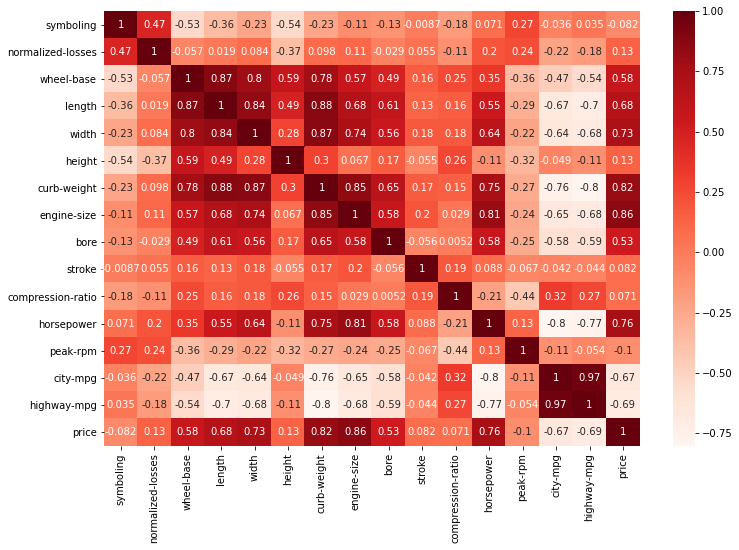

In [319]:
# Correlation matrix heatmap
plt.figure(figsize=(12,8))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [320]:
cor_target = abs(cor["price"])
cor_target
best_features = cor_target[cor_target > 0.5]
print(best_features)

wheel-base     0.583168
length         0.682986
width          0.728699
curb-weight    0.820825
engine-size    0.861752
bore           0.532300
horsepower     0.757917
city-mpg       0.667449
highway-mpg    0.690526
price          1.000000
Name: price, dtype: float64


In [321]:
num_col=best_features.index.tolist()

In [361]:
df_1=df_numeric[num_col]

### Removing Outliers

In [323]:
df_1=df_1[(np.abs(stats.zscore(X_numeric))<3).all(axis=1)]

In [324]:
df_1

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,13495.0
1,88.6,168.8,64.1,2548,130,3.47,111.0,21,27,16500.0
2,94.5,171.2,65.5,2823,152,2.68,154.0,19,26,16500.0
3,99.8,176.6,66.2,2337,109,3.19,102.0,24,30,13950.0
4,99.4,176.6,66.4,2824,136,3.19,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...
199,104.3,188.8,67.2,3157,130,3.62,162.0,17,22,18950.0
200,109.1,188.8,68.9,2952,141,3.78,114.0,23,28,16845.0
201,109.1,188.8,68.8,3049,141,3.78,160.0,19,25,19045.0
202,109.1,188.8,68.9,3012,173,3.58,134.0,18,23,21485.0


### Categorical data

In [325]:
df_object=df.select_dtypes(include=['object'])

In [335]:
df.columns=df.columns.str.replace('-','_')

In [341]:
object_col=df_object.columns.tolist()

In [347]:
object_col

['make',
 'fuel_type',
 'aspiration',
 'num_of_doors',
 'body_style',
 'drive_wheels',
 'engine_location',
 'engine_type',
 'num_of_cylinders',
 'fuel_system']

In [346]:
model=ols('price ~ C(make)',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
print(aov_table)

                sum_sq     df          F        PR(>F)
C(make)   9.750960e+09   21.0  29.502216  1.019818e-47
Residual  2.880213e+09  183.0        NaN           NaN


In [337]:
model=ols('price ~ fuel_type',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
fuel_type,1.534125e+08,1.0,2.495859,0.115703
Residual,1.247776e+10,203.0,NaN,NaN


In [338]:
model=ols('price ~ aspiration',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
aspiration,3.969954e+08,1.0,6.58729,0.010991
Residual,1.223418e+10,203.0,NaN,NaN


In [348]:
model=ols('price ~ num_of_doors',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
num_of_doors,2.222313e+07,1.0,0.357785,0.550406
Residual,1.260895e+10,203.0,NaN,NaN


In [349]:
model=ols('price ~ body_style',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
body_style,1.960055e+09,4.0,9.183927,7.844576e-07
Residual,1.067112e+10,200.0,NaN,NaN


In [350]:
model=ols('price ~ drive_wheels',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
drive_wheels,5.060130e+09,2.0,67.503667,3.539271e-23
Residual,7.571043e+09,202.0,NaN,NaN


In [351]:
model=ols('price ~ engine_location',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
engine_location,1.383992e+09,1.0,24.979629,0.000001
Residual,1.124718e+10,203.0,NaN,NaN


In [352]:
model=ols('price ~ engine_type',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
engine_type,2.538008e+09,6.0,8.298116,5.008078e-08
Residual,1.009316e+10,198.0,NaN,NaN


In [353]:
model=ols('price ~ num_of_cylinders',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
num_of_cylinders,7.336567e+09,6.0,45.727054,7.149270e-35
Residual,5.294606e+09,198.0,NaN,NaN


In [354]:
model=ols('price ~ fuel_system',df).fit()
aov_table=sm.stats.anova_lm(model,typ=2)
aov_table

,sum_sq,df,F,PR(>F)
fuel_system,4.352758e+09,7.0,14.797402,1.865735e-15
Residual,8.278415e+09,197.0,NaN,NaN


In [356]:
## fuel_system,num_of_cylinders,engine_type,engine_location,drive_wheels,aspiration,make are relevant
obj_col=['fuel_system','num_of_cylinders','engine_type','engine_location','drive_wheels','aspiration','make','body_style']
X_object=df_object[obj_col]

In [357]:
X_object=X.select_dtypes(include=['object'])
le = preprocessing.LabelEncoder()
X_object=X_object.apply(le.fit_transform)

### Concat both dataframes

In [363]:
df_final=pd.concat([df_1,X_object],axis=1)

In [364]:
df_final

,wheel-base,length,width,curb-weight,engine-size,bore,horsepower,city-mpg,highway-mpg,price,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
0,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519089,0.171065,-0.646553,-0.546059,0.036674,0,1,0,1,0,2,0,0,2,5
1,-1.690772,-0.426521,-0.844782,-0.014566,0.074449,0.519089,0.171065,-0.646553,-0.546059,0.419498,0,1,0,1,0,2,0,0,2,5
2,-0.708596,-0.231513,-0.190566,0.514882,0.604046,-2.404862,1.261807,-0.953012,-0.691627,0.419498,0,1,0,1,2,2,0,5,3,5
3,0.173698,0.207256,0.136542,-0.420797,-0.431076,-0.517248,-0.057230,-0.186865,-0.109354,0.094639,1,1,0,0,3,1,0,3,2,5
4,0.107110,0.207256,0.230001,0.516807,0.218885,-0.517248,0.272529,-1.106241,-1.273900,0.540524,1,1,0,0,3,0,0,3,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.721873,1.198549,1.398245,0.763241,0.339248,1.666463,0.247163,-0.340094,-0.400490,0.463449,21,1,0,0,3,2,0,3,2,5
201,1.721873,1.198549,1.351515,0.949992,0.339248,1.666463,1.414003,-0.953012,-0.837195,0.743720,21,1,1,0,3,2,0,3,2,5
202,1.721873,1.198549,1.398245,0.878757,1.109571,0.926222,0.754485,-1.106241,-1.128332,1.054566,21,1,0,0,3,2,0,5,3,5
203,1.721873,1.198549,1.398245,1.273437,0.435538,-1.183465,0.044234,0.119594,-0.546059,1.180051,21,0,1,0,3,2,0,3,3,3


## Modeling

In [365]:
df_final.dropna(inplace=True)

In [371]:
df_final.shape

(205, 20)

In [372]:
df_X=df_final.drop('price',axis=1)

In [374]:
df_y=df_final['price']

In [375]:
X_train,X_test,y_train,y_test=train_test_split(df_X,df_y,test_size=0.3,random_state=30)

In [376]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_hat=lr.predict(X_test)

In [377]:
print('r^2:',r2_score(y_test, y_hat))
print('rmse:',np.sqrt(mean_squared_error(y_test,y_hat)))

r^2: 0.709136171168917
rmse: 0.5079943600014641


/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/yanzhenlei/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


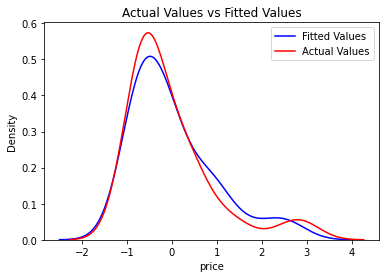

In [378]:
sns.distplot(y_hat,hist=False,color='b',label="Fitted Values")
sns.distplot(y_test,hist=False,color='r',label="Actual Values")
plt.title("Actual Values vs Fitted Values")
plt.legend()
plt.show()

## Assumption Check

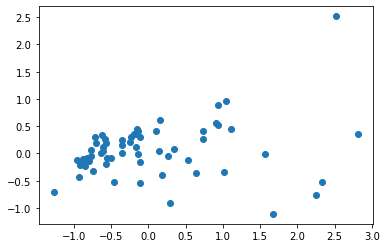

In [379]:
residuals = y_hat - y_test
plt.scatter(y_hat, residuals)

We do not see any conic-like shape or evidence of unequal variance across all values, so we can say that this assumption is also verified.

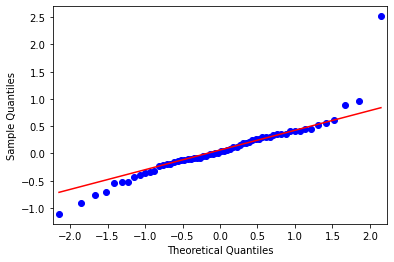

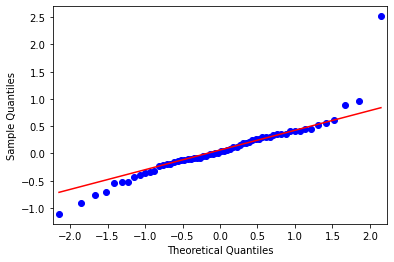

In [380]:
qqplot(residuals, line = 'q')

As we see above, the blue observation points fall consistently in a linear pattern, proving to us that our residuals are normally distributed. This assumption is now verified.